In [165]:
%reset -f

#2022July8 linear regression power formula, KML file added

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [166]:
df1=pd.read_csv('dataset\silagecorn-province.csv')
#df_county1.drop(columns=['Province_number', 'County_number'])
#display(df_county1)

In [167]:
#df_county2 = df_county1[['Province','County','Region','Region_NW1SW2NE3','growth_days','irrig_count'
#                         ,'irrig_wat_m3ha','Ecwat','soil_texture_heavy0normallight1'
#                         , 'ETo_mm','elevation_m', 'latitude','longitude','yield_tonha' ]].copy()
df2=df1.copy()
display(df2)
df2=df1[['Province','ProvinceNo','FarmCount','Ecwat','soiltexture_heavy0light1'
                       ,'growth_days_GI','irrigation_count','ETo_mm','elevation_m'
                       ,'irrig_water_m3ha','yield_tonha']].copy()
display(df2)


,ProvinceNo,Province,Province_number,FarmCount,CountyCount,Region,Region_NW1_SW2_NE3,Water_source_well0_canal1,network_traditional0_modern1,Ecwat,crop_area_ha,soiltexture_heavy0light1,Ecsoil,cultivar_704_1_other_2,growth_days_GI,irrig_method_surf0_pressure1,irrigation_count,yield_tonha,Climate,Climate_cold0_warm1,ETo_mm,elevation_m,education_1preHS_2HS_3above HS,irrig_water_m3ha
0,1,Alborz,1,6,2,NW,1,0.2,0.3,0.4,8,0.8,0.5,1.0,97.2,0.8,10.7,51.3,semi arid cold,0,572,1453,3.0,8126
1,2,Tehran,2,19,3,NW,1,0.3,0.5,0.9,7,0.2,1.5,1.1,96.7,0.6,8.2,53.8,arid-cold,0,637,1074,2.5,6384
2,3,Gazvin,3,10,2,NW,1,0.0,0.3,2.9,18,0.2,2.1,1.4,106.0,0.7,9.1,49.1,semi arid cold,0,673,1281,2.4,8001
3,4,Ardabil,4,6,1,NW,1,1.0,1.0,1.1,8,0.0,1.1,1.0,83.8,1.0,4.7,32.8,semi arid cold,0,422,97,1.3,5868
4,5,Esfahan,5,9,1,SW,2,0.0,0.4,2.4,14,0.6,3.5,1.0,103.3,0.6,18.0,58.2,arid-cold,0,732,1715,1.8,8001
5,6,Fars,6,12,2,SW,2,0.0,0.4,1.6,5,0.3,2.6,1.1,95.9,0.6,13.3,63.1,semi wet cold,0,612,1592,1.8,8758
6,7,KhorasanR,7,18,3,NE,3,0.0,0.7,1.2,13,0.9,2.1,1.6,92.4,0.4,16.6,76.1,semi arid cold,0,783,1016,1.9,9695
7,8,Khozestan,8,24,2,SW,2,0.7,0.8,1.7,10,0.6,3.3,1.8,100.8,0.6,19.1,48.6,semi arid warm,1,529,221,1.6,7440


,Province,ProvinceNo,FarmCount,Ecwat,soiltexture_heavy0light1,growth_days_GI,irrigation_count,ETo_mm,elevation_m,irrig_water_m3ha,yield_tonha
0,Alborz,1,6,0.4,0.8,97.2,10.7,572,1453,8126,51.3
1,Tehran,2,19,0.9,0.2,96.7,8.2,637,1074,6384,53.8
2,Gazvin,3,10,2.9,0.2,106.0,9.1,673,1281,8001,49.1
3,Ardabil,4,6,1.1,0.0,83.8,4.7,422,97,5868,32.8
4,Esfahan,5,9,2.4,0.6,103.3,18.0,732,1715,8001,58.2
5,Fars,6,12,1.6,0.3,95.9,13.3,612,1592,8758,63.1
6,KhorasanR,7,18,1.2,0.9,92.4,16.6,783,1016,9695,76.1
7,Khozestan,8,24,1.7,0.6,100.8,19.1,529,221,7440,48.6


In [168]:
x_ecwat = df2['Ecwat'].to_numpy()
x_soil = df2['soiltexture_heavy0light1'].to_numpy()
x_gd  = df2['growth_days_GI'].to_numpy()
x_ie = df2['irrigation_count'].to_numpy()
x_eto = df2['ETo_mm'].to_numpy()
x_elev = df2['elevation_m'].to_numpy()
x_wat = df2['irrig_water_m3ha'].to_numpy()
y= df2['yield_tonha'].to_numpy()
N=7
x=np.c_[x_ecwat,x_soil,x_gd,x_ie,x_eto,x_elev,x_wat]
province=df2['Province'].astype(str).values.tolist()

[67.9 67.9 67.9 67.9 67.9 67.9 67.9 67.9]
[ 1.052  0.046  0.429 -0.373  0.209  0.     0.     0.     0.     0.   ]


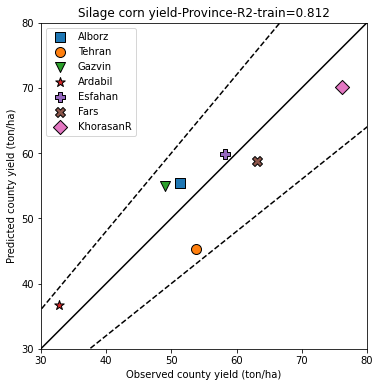

In [169]:

ind=np.random.choice(N,N)<N*0.7

ind=y<1000


a = [1.358, 0,0,0,0,0,0,0,0,0]

def func1(a,x): 
    x_ecwat=x[:,0]
    x_soil=x[:,1]
    x_gd=x[:,2]
    x_ie=x[:,3]
    x_eto=x[:,4]
    x_elev=x[:,5]
    x_wat=x[:,6]
    #return 50*(a[0]+a[7]*x_wat/10000)
    #return 50*(a[0]+a[5]*x_eto/800+a[7]*x_wat/10000)
    #return 50*(a[0]+a[3]*x_gd/100+a[7]*x_wat/10000)
    #return 50*(a[0]+a[6]*x_elev/2000+a[7]*x_wat/10000)
    #return 50*(a[0]+a[4]*x_ie/20+a[5]*x_eto/800)
    #return 50*(a[0]+a[4]*x_ie/20+a[8]*x_wat/10000)
    return 50*(a[0]+a[1]*x_ecwat+a[2]*x_soil+a[3]*x_gd/100+a[4]*x_ie/20)



func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2

print(func1(a,x))

res = minimize(func2,a)
a=np.round(res.x,3)

print(a)

y1=50*(-0.24+0.12*x_ie/20+1.603*x_wat/10000)
y2=50*(-0.054+0.236*x_ie/20+1.277*x_eto/800)
y3=50*(-0.235+0.095*x_elev/2000+1.628*x_wat/10000)
y4=50*(-0.129+-0.186*x_gd/100+1.789*x_wat/10000)
y5=50*(-0.386+0.837*x_eto/800+1.054*x_wat/10000)
y6=50*(1.052+0.046*x_ecwat/1+0.429*x_soil/1-0.373*x_gd/100+0.209*x_ie/20)



y_hat_lin1=func1(a,x)
y_hat_lin1=(y1+y2+y3+y4+y5+y6)/6

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D']

for i in range(N):
    m=ax.scatter(y[i], y_hat_lin1[i],marker=markers_[i],label=province[i],s=100,edgecolor='k')

ax.legend()

ax.plot(np.array([0,100]),np.array([0,100]), 'k-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'k--')
ax.set_xlabel('Observed county yield (ton/ha)')
ax.set_ylabel('Predicted county yield (ton/ha)')
ax.set_xlim(left=30,right=80)
ax.set_ylim(bottom=30,top=80)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2=np.round(r2_score(y,y_hat_lin1),3)

ax.set_title("Silage corn yield-Province-R2-train="+str(R2))
fig.savefig('fig\silage_corn_province_yield_fusion.png', dpi=300)



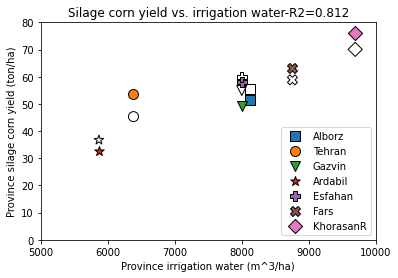

In [170]:
for i in range(N):
    plt.scatter(x_wat[i], y[i],marker=markers_[i],label=province[i],s=100,edgecolor='k')
    plt.scatter(x_wat[i], y_hat_lin1[i],marker=markers_[i],s=100,facecolor='none',edgecolor='k')

plt.xlabel('Province irrigation water (m^3/ha)')
plt.ylabel('Province silage corn yield (ton/ha)')
plt.legend(loc='lower right')
plt.xlim(left=5000,right=10000)
plt.ylim(bottom=0,top=80)

plt.title("Silage corn yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig\silage_corn_province_yield_vs_irrigwat.png', dpi=300)